<a href="https://colab.research.google.com/github/smritiramakrishnan/AI-Inspirit/blob/main/Adrenomedullin_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data Exploration

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_path = '/content/gdrive/MyDrive/pone.csv'
adm_dataset = pd.read_csv(file_path)
adm_dataset.tail()

,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T2_HADSanxiety,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems
92,100.0,Yin Yoga,NaN,57.0,Woman,30.071168,0.77,5.974388,NaN,26.0,...,NaN,11.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
93,102.0,Control,NaN,63.0,Woman,28.515625,0.96,5.947966,6.276932,16.0,...,9.0,5.0,4.0,22.0,20.0,-0.328966,2.0,0.0,1.0,2.0
94,103.0,Control,NaN,54.0,Woman,24.447279,0.96,5.694860,6.010311,24.0,...,13.0,3.0,4.0,16.0,14.0,-0.315451,5.0,-1.0,-1.0,2.0
95,104.0,Yin Yoga,NaN,39.0,Woman,18.929151,0.73,5.584937,5.365464,19.0,...,7.0,7.0,7.0,16.0,13.0,0.219473,3.0,5.0,0.0,3.0
96,105.0,YOMI,230.0,62.0,Woman,18.285714,0.82,5.687893,5.677062,11.0,...,4.0,0.0,0.0,8.0,7.0,0.010830,-1.0,0.0,0.0,1.0


In [ ]:
adm_dataset.shape

(97, 22)

In [ ]:
adm_dataset.isna().sum().sum()

264

Filling PractiseHome null values

In [ ]:
z = adm_dataset['PractiseHome'].mean()
for i in range(0, len(adm_dataset)):
  if(adm_dataset['Group'][i] == 'Control'):
    adm_dataset.loc[i, 'PractiseHome'] = 0
adm_dataset['PractiseHome'].fillna(z, inplace = True)
adm_dataset

,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T2_HADSanxiety,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems
0,1.0,Yin Yoga,80.00,54.0,Man,29.365763,0.66,5.477096,5.330372,19.0,...,12.0,5.0,3.0,29.0,26.0,0.146724,-4.0,0.0,2.0,3.0
1,2.0,Control,0.00,46.0,Woman,19.377163,0.83,5.781606,5.375790,24.0,...,6.0,5.0,2.0,21.0,12.0,0.405816,10.0,4.0,3.0,9.0
2,3.0,YOMI,250.00,51.0,Woman,22.100290,0.75,NaN,5.308911,15.0,...,8.0,3.0,2.0,17.0,12.0,NaN,5.0,1.0,1.0,5.0
3,4.0,YOMI,264.00,53.0,Woman,27.968016,0.98,6.219021,5.927980,10.0,...,11.0,1.0,3.0,11.0,11.0,0.291041,-6.0,-1.0,-2.0,0.0
4,5.0,Control,0.00,62.0,Woman,27.099251,1.45,6.202047,6.675541,25.0,...,NaN,9.0,NaN,17.0,NaN,-0.473494,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,100.0,Yin Yoga,283.78,57.0,Woman,30.071168,0.77,5.974388,NaN,26.0,...,NaN,11.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
93,102.0,Control,0.00,63.0,Woman,28.515625,0.96,5.947966,6.276932,16.0,...,9.0,5.0,4.0,22.0,20.0,-0.328966,2.0,0.0,1.0,2.0
94,103.0,Control,0.00,54.0,Woman,24.447279,0.96,5.694860,6.010311,24.0,...,13.0,3.0,4.0,16.0,14.0,-0.315451,5.0,-1.0,-1.0,2.0
95,104.0,Yin Yoga,283.78,39.0,Woman,18.929151,0.73,5.584937,5.365464,19.0,...,7.0,7.0,7.0,16.0,13.0,0.219473,3.0,5.0,0.0,3.0


In [ ]:
adm_dataset['BMI'].fillna(adm_dataset['BMI'].mean(), inplace=True)
adm_dataset

,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T2_HADSanxiety,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems
0,1.0,Yin Yoga,80.00,54.0,Man,29.365763,0.66,5.477096,5.330372,19.0,...,12.0,5.0,3.0,29.0,26.0,0.146724,-4.0,0.0,2.0,3.0
1,2.0,Control,0.00,46.0,Woman,19.377163,0.83,5.781606,5.375790,24.0,...,6.0,5.0,2.0,21.0,12.0,0.405816,10.0,4.0,3.0,9.0
2,3.0,YOMI,250.00,51.0,Woman,22.100290,0.75,NaN,5.308911,15.0,...,8.0,3.0,2.0,17.0,12.0,NaN,5.0,1.0,1.0,5.0
3,4.0,YOMI,264.00,53.0,Woman,27.968016,0.98,6.219021,5.927980,10.0,...,11.0,1.0,3.0,11.0,11.0,0.291041,-6.0,-1.0,-2.0,0.0
4,5.0,Control,0.00,62.0,Woman,27.099251,1.45,6.202047,6.675541,25.0,...,NaN,9.0,NaN,17.0,NaN,-0.473494,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,100.0,Yin Yoga,283.78,57.0,Woman,30.071168,0.77,5.974388,NaN,26.0,...,NaN,11.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
93,102.0,Control,0.00,63.0,Woman,28.515625,0.96,5.947966,6.276932,16.0,...,9.0,5.0,4.0,22.0,20.0,-0.328966,2.0,0.0,1.0,2.0
94,103.0,Control,0.00,54.0,Woman,24.447279,0.96,5.694860,6.010311,24.0,...,13.0,3.0,4.0,16.0,14.0,-0.315451,5.0,-1.0,-1.0,2.0
95,104.0,Yin Yoga,283.78,39.0,Woman,18.929151,0.73,5.584937,5.365464,19.0,...,7.0,7.0,7.0,16.0,13.0,0.219473,3.0,5.0,0.0,3.0


In [ ]:
adm_dataset['T1_p_cystatin'].fillna(adm_dataset['T1_p_cystatin'].mean(), inplace=True)
adm_dataset

,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T2_HADSanxiety,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems
0,1.0,Yin Yoga,80.00,54.0,Man,29.365763,0.66,5.477096,5.330372,19.0,...,12.0,5.0,3.0,29.0,26.0,0.146724,-4.0,0.0,2.0,3.0
1,2.0,Control,0.00,46.0,Woman,19.377163,0.83,5.781606,5.375790,24.0,...,6.0,5.0,2.0,21.0,12.0,0.405816,10.0,4.0,3.0,9.0
2,3.0,YOMI,250.00,51.0,Woman,22.100290,0.75,NaN,5.308911,15.0,...,8.0,3.0,2.0,17.0,12.0,NaN,5.0,1.0,1.0,5.0
3,4.0,YOMI,264.00,53.0,Woman,27.968016,0.98,6.219021,5.927980,10.0,...,11.0,1.0,3.0,11.0,11.0,0.291041,-6.0,-1.0,-2.0,0.0
4,5.0,Control,0.00,62.0,Woman,27.099251,1.45,6.202047,6.675541,25.0,...,NaN,9.0,NaN,17.0,NaN,-0.473494,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,100.0,Yin Yoga,283.78,57.0,Woman,30.071168,0.77,5.974388,NaN,26.0,...,NaN,11.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
93,102.0,Control,0.00,63.0,Woman,28.515625,0.96,5.947966,6.276932,16.0,...,9.0,5.0,4.0,22.0,20.0,-0.328966,2.0,0.0,1.0,2.0
94,103.0,Control,0.00,54.0,Woman,24.447279,0.96,5.694860,6.010311,24.0,...,13.0,3.0,4.0,16.0,14.0,-0.315451,5.0,-1.0,-1.0,2.0
95,104.0,Yin Yoga,283.78,39.0,Woman,18.929151,0.73,5.584937,5.365464,19.0,...,7.0,7.0,7.0,16.0,13.0,0.219473,3.0,5.0,0.0,3.0


In [ ]:
adm_dataset['T1_ADM'].fillna(adm_dataset['T1_ADM'].mean(), inplace=True)
adm_dataset

,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T2_HADSanxiety,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems
0,1.0,Yin Yoga,80.00,54.0,Man,29.365763,0.66,5.477096,5.330372,19.0,...,12.0,5.0,3.0,29.0,26.0,0.146724,-4.0,0.0,2.0,3.0
1,2.0,Control,0.00,46.0,Woman,19.377163,0.83,5.781606,5.375790,24.0,...,6.0,5.0,2.0,21.0,12.0,0.405816,10.0,4.0,3.0,9.0
2,3.0,YOMI,250.00,51.0,Woman,22.100290,0.75,5.928312,5.308911,15.0,...,8.0,3.0,2.0,17.0,12.0,NaN,5.0,1.0,1.0,5.0
3,4.0,YOMI,264.00,53.0,Woman,27.968016,0.98,6.219021,5.927980,10.0,...,11.0,1.0,3.0,11.0,11.0,0.291041,-6.0,-1.0,-2.0,0.0
4,5.0,Control,0.00,62.0,Woman,27.099251,1.45,6.202047,6.675541,25.0,...,NaN,9.0,NaN,17.0,NaN,-0.473494,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,100.0,Yin Yoga,283.78,57.0,Woman,30.071168,0.77,5.974388,NaN,26.0,...,NaN,11.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
93,102.0,Control,0.00,63.0,Woman,28.515625,0.96,5.947966,6.276932,16.0,...,9.0,5.0,4.0,22.0,20.0,-0.328966,2.0,0.0,1.0,2.0
94,103.0,Control,0.00,54.0,Woman,24.447279,0.96,5.694860,6.010311,24.0,...,13.0,3.0,4.0,16.0,14.0,-0.315451,5.0,-1.0,-1.0,2.0
95,104.0,Yin Yoga,283.78,39.0,Woman,18.929151,0.73,5.584937,5.365464,19.0,...,7.0,7.0,7.0,16.0,13.0,0.219473,3.0,5.0,0.0,3.0


In [ ]:
adm_dataset['T2_ADM'].isna().sum()
adm_dataset['T2_ADM'].fillna(adm_dataset['T2_ADM'].mean(), inplace=True)
adm_dataset

,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T2_HADSanxiety,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems
0,1.0,Yin Yoga,80.00,54.0,Man,29.365763,0.66,5.477096,5.330372,19.0,...,12.0,5.0,3.0,29.0,26.0,0.146724,-4.0,0.0,2.0,3.0
1,2.0,Control,0.00,46.0,Woman,19.377163,0.83,5.781606,5.375790,24.0,...,6.0,5.0,2.0,21.0,12.0,0.405816,10.0,4.0,3.0,9.0
2,3.0,YOMI,250.00,51.0,Woman,22.100290,0.75,5.928312,5.308911,15.0,...,8.0,3.0,2.0,17.0,12.0,NaN,5.0,1.0,1.0,5.0
3,4.0,YOMI,264.00,53.0,Woman,27.968016,0.98,6.219021,5.927980,10.0,...,11.0,1.0,3.0,11.0,11.0,0.291041,-6.0,-1.0,-2.0,0.0
4,5.0,Control,0.00,62.0,Woman,27.099251,1.45,6.202047,6.675541,25.0,...,NaN,9.0,NaN,17.0,NaN,-0.473494,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,100.0,Yin Yoga,283.78,57.0,Woman,30.071168,0.77,5.974388,5.923318,26.0,...,NaN,11.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
93,102.0,Control,0.00,63.0,Woman,28.515625,0.96,5.947966,6.276932,16.0,...,9.0,5.0,4.0,22.0,20.0,-0.328966,2.0,0.0,1.0,2.0
94,103.0,Control,0.00,54.0,Woman,24.447279,0.96,5.694860,6.010311,24.0,...,13.0,3.0,4.0,16.0,14.0,-0.315451,5.0,-1.0,-1.0,2.0
95,104.0,Yin Yoga,283.78,39.0,Woman,18.929151,0.73,5.584937,5.365464,19.0,...,7.0,7.0,7.0,16.0,13.0,0.219473,3.0,5.0,0.0,3.0


In [ ]:
print(adm_dataset['T2_PSS'].isna().sum())
adm_dataset['T2_PSS'].fillna(adm_dataset['T2_PSS'].mean(), inplace=True)
adm_dataset

19


,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T2_HADSanxiety,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems
0,1.0,Yin Yoga,80.00,54.0,Man,29.365763,0.66,5.477096,5.330372,19.0,...,12.0,5.0,3.0,29.0,26.0,0.146724,-4.0,0.0,2.0,3.0
1,2.0,Control,0.00,46.0,Woman,19.377163,0.83,5.781606,5.375790,24.0,...,6.0,5.0,2.0,21.0,12.0,0.405816,10.0,4.0,3.0,9.0
2,3.0,YOMI,250.00,51.0,Woman,22.100290,0.75,5.928312,5.308911,15.0,...,8.0,3.0,2.0,17.0,12.0,NaN,5.0,1.0,1.0,5.0
3,4.0,YOMI,264.00,53.0,Woman,27.968016,0.98,6.219021,5.927980,10.0,...,11.0,1.0,3.0,11.0,11.0,0.291041,-6.0,-1.0,-2.0,0.0
4,5.0,Control,0.00,62.0,Woman,27.099251,1.45,6.202047,6.675541,25.0,...,NaN,9.0,NaN,17.0,NaN,-0.473494,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,100.0,Yin Yoga,283.78,57.0,Woman,30.071168,0.77,5.974388,5.923318,26.0,...,NaN,11.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
93,102.0,Control,0.00,63.0,Woman,28.515625,0.96,5.947966,6.276932,16.0,...,9.0,5.0,4.0,22.0,20.0,-0.328966,2.0,0.0,1.0,2.0
94,103.0,Control,0.00,54.0,Woman,24.447279,0.96,5.694860,6.010311,24.0,...,13.0,3.0,4.0,16.0,14.0,-0.315451,5.0,-1.0,-1.0,2.0
95,104.0,Yin Yoga,283.78,39.0,Woman,18.929151,0.73,5.584937,5.365464,19.0,...,7.0,7.0,7.0,16.0,13.0,0.219473,3.0,5.0,0.0,3.0


In [ ]:
print(adm_dataset['T2_HADSanxiety'].isna().sum())
adm_dataset['T2_HADSanxiety'].fillna(adm_dataset['T2_HADSanxiety'].mean(), inplace=True)
adm_dataset

19


,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T2_HADSanxiety,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems
0,1.0,Yin Yoga,80.00,54.0,Man,29.365763,0.66,5.477096,5.330372,19.0,...,12.000000,5.0,3.0,29.0,26.0,0.146724,-4.0,0.0,2.0,3.0
1,2.0,Control,0.00,46.0,Woman,19.377163,0.83,5.781606,5.375790,24.0,...,6.000000,5.0,2.0,21.0,12.0,0.405816,10.0,4.0,3.0,9.0
2,3.0,YOMI,250.00,51.0,Woman,22.100290,0.75,5.928312,5.308911,15.0,...,8.000000,3.0,2.0,17.0,12.0,NaN,5.0,1.0,1.0,5.0
3,4.0,YOMI,264.00,53.0,Woman,27.968016,0.98,6.219021,5.927980,10.0,...,11.000000,1.0,3.0,11.0,11.0,0.291041,-6.0,-1.0,-2.0,0.0
4,5.0,Control,0.00,62.0,Woman,27.099251,1.45,6.202047,6.675541,25.0,...,7.205128,9.0,NaN,17.0,NaN,-0.473494,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,100.0,Yin Yoga,283.78,57.0,Woman,30.071168,0.77,5.974388,5.923318,26.0,...,7.205128,11.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN
93,102.0,Control,0.00,63.0,Woman,28.515625,0.96,5.947966,6.276932,16.0,...,9.000000,5.0,4.0,22.0,20.0,-0.328966,2.0,0.0,1.0,2.0
94,103.0,Control,0.00,54.0,Woman,24.447279,0.96,5.694860,6.010311,24.0,...,13.000000,3.0,4.0,16.0,14.0,-0.315451,5.0,-1.0,-1.0,2.0
95,104.0,Yin Yoga,283.78,39.0,Woman,18.929151,0.73,5.584937,5.365464,19.0,...,7.000000,7.0,7.0,16.0,13.0,0.219473,3.0,5.0,0.0,3.0


In [ ]:
print(adm_dataset['T2_HADSdepression'].isna().sum())
adm_dataset['T2_HADSdepression'].fillna(adm_dataset['T2_HADSdepression'].mean(), inplace=True)
adm_dataset

19


,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T2_HADSanxiety,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems
0,1.0,Yin Yoga,80.00,54.0,Man,29.365763,0.66,5.477096,5.330372,19.0,...,12.000000,5.0,3.000000,29.0,26.0,0.146724,-4.0,0.0,2.0,3.0
1,2.0,Control,0.00,46.0,Woman,19.377163,0.83,5.781606,5.375790,24.0,...,6.000000,5.0,2.000000,21.0,12.0,0.405816,10.0,4.0,3.0,9.0
2,3.0,YOMI,250.00,51.0,Woman,22.100290,0.75,5.928312,5.308911,15.0,...,8.000000,3.0,2.000000,17.0,12.0,NaN,5.0,1.0,1.0,5.0
3,4.0,YOMI,264.00,53.0,Woman,27.968016,0.98,6.219021,5.927980,10.0,...,11.000000,1.0,3.000000,11.0,11.0,0.291041,-6.0,-1.0,-2.0,0.0
4,5.0,Control,0.00,62.0,Woman,27.099251,1.45,6.202047,6.675541,25.0,...,7.205128,9.0,3.961538,17.0,NaN,-0.473494,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,100.0,Yin Yoga,283.78,57.0,Woman,30.071168,0.77,5.974388,5.923318,26.0,...,7.205128,11.0,3.961538,24.0,NaN,NaN,NaN,NaN,NaN,NaN
93,102.0,Control,0.00,63.0,Woman,28.515625,0.96,5.947966,6.276932,16.0,...,9.000000,5.0,4.000000,22.0,20.0,-0.328966,2.0,0.0,1.0,2.0
94,103.0,Control,0.00,54.0,Woman,24.447279,0.96,5.694860,6.010311,24.0,...,13.000000,3.0,4.000000,16.0,14.0,-0.315451,5.0,-1.0,-1.0,2.0
95,104.0,Yin Yoga,283.78,39.0,Woman,18.929151,0.73,5.584937,5.365464,19.0,...,7.000000,7.0,7.000000,16.0,13.0,0.219473,3.0,5.0,0.0,3.0


In [ ]:
print(adm_dataset['T2_SleepProblem'].isna().sum())
adm_dataset['T2_SleepProblem'].fillna(adm_dataset['T2_SleepProblem'].mean(), inplace=True)
adm_dataset

19


,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T2_HADSanxiety,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems
0,1.0,Yin Yoga,80.00,54.0,Man,29.365763,0.66,5.477096,5.330372,19.0,...,12.000000,5.0,3.000000,29.0,26.000000,0.146724,-4.0,0.0,2.0,3.0
1,2.0,Control,0.00,46.0,Woman,19.377163,0.83,5.781606,5.375790,24.0,...,6.000000,5.0,2.000000,21.0,12.000000,0.405816,10.0,4.0,3.0,9.0
2,3.0,YOMI,250.00,51.0,Woman,22.100290,0.75,5.928312,5.308911,15.0,...,8.000000,3.0,2.000000,17.0,12.000000,NaN,5.0,1.0,1.0,5.0
3,4.0,YOMI,264.00,53.0,Woman,27.968016,0.98,6.219021,5.927980,10.0,...,11.000000,1.0,3.000000,11.0,11.000000,0.291041,-6.0,-1.0,-2.0,0.0
4,5.0,Control,0.00,62.0,Woman,27.099251,1.45,6.202047,6.675541,25.0,...,7.205128,9.0,3.961538,17.0,16.371795,-0.473494,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,100.0,Yin Yoga,283.78,57.0,Woman,30.071168,0.77,5.974388,5.923318,26.0,...,7.205128,11.0,3.961538,24.0,16.371795,NaN,NaN,NaN,NaN,NaN
93,102.0,Control,0.00,63.0,Woman,28.515625,0.96,5.947966,6.276932,16.0,...,9.000000,5.0,4.000000,22.0,20.000000,-0.328966,2.0,0.0,1.0,2.0
94,103.0,Control,0.00,54.0,Woman,24.447279,0.96,5.694860,6.010311,24.0,...,13.000000,3.0,4.000000,16.0,14.000000,-0.315451,5.0,-1.0,-1.0,2.0
95,104.0,Yin Yoga,283.78,39.0,Woman,18.929151,0.73,5.584937,5.365464,19.0,...,7.000000,7.0,7.000000,16.0,13.000000,0.219473,3.0,5.0,0.0,3.0


In [ ]:
for i in range(0, len(adm_dataset)):
  adm_dataset.loc[i, 'Diff_PSS'] = adm_dataset['T1_PSS'][i] - adm_dataset['T2_PSS'][i]
adm_dataset

,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T2_HADSanxiety,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems
0,1.0,Yin Yoga,80.00,54.0,Man,29.365763,0.66,5.477096,5.330372,19.0,...,12.000000,5.0,3.000000,29.0,26.000000,0.146724,-4.000000,0.0,2.0,3.0
1,2.0,Control,0.00,46.0,Woman,19.377163,0.83,5.781606,5.375790,24.0,...,6.000000,5.0,2.000000,21.0,12.000000,0.405816,10.000000,4.0,3.0,9.0
2,3.0,YOMI,250.00,51.0,Woman,22.100290,0.75,5.928312,5.308911,15.0,...,8.000000,3.0,2.000000,17.0,12.000000,NaN,5.000000,1.0,1.0,5.0
3,4.0,YOMI,264.00,53.0,Woman,27.968016,0.98,6.219021,5.927980,10.0,...,11.000000,1.0,3.000000,11.0,11.000000,0.291041,-6.000000,-1.0,-2.0,0.0
4,5.0,Control,0.00,62.0,Woman,27.099251,1.45,6.202047,6.675541,25.0,...,7.205128,9.0,3.961538,17.0,16.371795,-0.473494,11.217949,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,100.0,Yin Yoga,283.78,57.0,Woman,30.071168,0.77,5.974388,5.923318,26.0,...,7.205128,11.0,3.961538,24.0,16.371795,NaN,12.217949,NaN,NaN,NaN
93,102.0,Control,0.00,63.0,Woman,28.515625,0.96,5.947966,6.276932,16.0,...,9.000000,5.0,4.000000,22.0,20.000000,-0.328966,2.000000,0.0,1.0,2.0
94,103.0,Control,0.00,54.0,Woman,24.447279,0.96,5.694860,6.010311,24.0,...,13.000000,3.0,4.000000,16.0,14.000000,-0.315451,5.000000,-1.0,-1.0,2.0
95,104.0,Yin Yoga,283.78,39.0,Woman,18.929151,0.73,5.584937,5.365464,19.0,...,7.000000,7.0,7.000000,16.0,13.000000,0.219473,3.000000,5.0,0.0,3.0


In [ ]:
for i in range(0, len(adm_dataset)):
  adm_dataset.loc[i, 'Diff_Anxiety'] = adm_dataset['T1_HADSanxiety'][i] - adm_dataset['T2_HADSanxiety'][i]
adm_dataset

,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T2_HADSanxiety,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems
0,1.0,Yin Yoga,80.00,54.0,Man,29.365763,0.66,5.477096,5.330372,19.0,...,12.000000,5.0,3.000000,29.0,26.000000,0.146724,-4.000000,0.000000,2.0,3.0
1,2.0,Control,0.00,46.0,Woman,19.377163,0.83,5.781606,5.375790,24.0,...,6.000000,5.0,2.000000,21.0,12.000000,0.405816,10.000000,4.000000,3.0,9.0
2,3.0,YOMI,250.00,51.0,Woman,22.100290,0.75,5.928312,5.308911,15.0,...,8.000000,3.0,2.000000,17.0,12.000000,NaN,5.000000,1.000000,1.0,5.0
3,4.0,YOMI,264.00,53.0,Woman,27.968016,0.98,6.219021,5.927980,10.0,...,11.000000,1.0,3.000000,11.0,11.000000,0.291041,-6.000000,-1.000000,-2.0,0.0
4,5.0,Control,0.00,62.0,Woman,27.099251,1.45,6.202047,6.675541,25.0,...,7.205128,9.0,3.961538,17.0,16.371795,-0.473494,11.217949,4.794872,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,100.0,Yin Yoga,283.78,57.0,Woman,30.071168,0.77,5.974388,5.923318,26.0,...,7.205128,11.0,3.961538,24.0,16.371795,NaN,12.217949,6.794872,NaN,NaN
93,102.0,Control,0.00,63.0,Woman,28.515625,0.96,5.947966,6.276932,16.0,...,9.000000,5.0,4.000000,22.0,20.000000,-0.328966,2.000000,0.000000,1.0,2.0
94,103.0,Control,0.00,54.0,Woman,24.447279,0.96,5.694860,6.010311,24.0,...,13.000000,3.0,4.000000,16.0,14.000000,-0.315451,5.000000,-1.000000,-1.0,2.0
95,104.0,Yin Yoga,283.78,39.0,Woman,18.929151,0.73,5.584937,5.365464,19.0,...,7.000000,7.0,7.000000,16.0,13.000000,0.219473,3.000000,5.000000,0.0,3.0


In [ ]:
for i in range(0, len(adm_dataset)):
  adm_dataset.loc[i, 'Diff_Depression'] = adm_dataset['T1_HADSdepression'][i] - adm_dataset['T2_HADSdepression'][i]
adm_dataset

,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T2_HADSanxiety,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems
0,1.0,Yin Yoga,80.00,54.0,Man,29.365763,0.66,5.477096,5.330372,19.0,...,12.000000,5.0,3.000000,29.0,26.000000,0.146724,-4.000000,0.000000,2.000000,3.0
1,2.0,Control,0.00,46.0,Woman,19.377163,0.83,5.781606,5.375790,24.0,...,6.000000,5.0,2.000000,21.0,12.000000,0.405816,10.000000,4.000000,3.000000,9.0
2,3.0,YOMI,250.00,51.0,Woman,22.100290,0.75,5.928312,5.308911,15.0,...,8.000000,3.0,2.000000,17.0,12.000000,NaN,5.000000,1.000000,1.000000,5.0
3,4.0,YOMI,264.00,53.0,Woman,27.968016,0.98,6.219021,5.927980,10.0,...,11.000000,1.0,3.000000,11.0,11.000000,0.291041,-6.000000,-1.000000,-2.000000,0.0
4,5.0,Control,0.00,62.0,Woman,27.099251,1.45,6.202047,6.675541,25.0,...,7.205128,9.0,3.961538,17.0,16.371795,-0.473494,11.217949,4.794872,5.038462,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,100.0,Yin Yoga,283.78,57.0,Woman,30.071168,0.77,5.974388,5.923318,26.0,...,7.205128,11.0,3.961538,24.0,16.371795,NaN,12.217949,6.794872,7.038462,NaN
93,102.0,Control,0.00,63.0,Woman,28.515625,0.96,5.947966,6.276932,16.0,...,9.000000,5.0,4.000000,22.0,20.000000,-0.328966,2.000000,0.000000,1.000000,2.0
94,103.0,Control,0.00,54.0,Woman,24.447279,0.96,5.694860,6.010311,24.0,...,13.000000,3.0,4.000000,16.0,14.000000,-0.315451,5.000000,-1.000000,-1.000000,2.0
95,104.0,Yin Yoga,283.78,39.0,Woman,18.929151,0.73,5.584937,5.365464,19.0,...,7.000000,7.0,7.000000,16.0,13.000000,0.219473,3.000000,5.000000,0.000000,3.0


In [ ]:
for i in range(0, len(adm_dataset)):
  adm_dataset.loc[i, 'Diff_SleepProblems'] = adm_dataset['T1_SleepProblem'][i] - adm_dataset['T2_SleepProblem'][i]
adm_dataset

,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T2_HADSanxiety,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems
0,1.0,Yin Yoga,80.00,54.0,Man,29.365763,0.66,5.477096,5.330372,19.0,...,12.000000,5.0,3.000000,29.0,26.000000,0.146724,-4.000000,0.000000,2.000000,3.000000
1,2.0,Control,0.00,46.0,Woman,19.377163,0.83,5.781606,5.375790,24.0,...,6.000000,5.0,2.000000,21.0,12.000000,0.405816,10.000000,4.000000,3.000000,9.000000
2,3.0,YOMI,250.00,51.0,Woman,22.100290,0.75,5.928312,5.308911,15.0,...,8.000000,3.0,2.000000,17.0,12.000000,NaN,5.000000,1.000000,1.000000,5.000000
3,4.0,YOMI,264.00,53.0,Woman,27.968016,0.98,6.219021,5.927980,10.0,...,11.000000,1.0,3.000000,11.0,11.000000,0.291041,-6.000000,-1.000000,-2.000000,0.000000
4,5.0,Control,0.00,62.0,Woman,27.099251,1.45,6.202047,6.675541,25.0,...,7.205128,9.0,3.961538,17.0,16.371795,-0.473494,11.217949,4.794872,5.038462,0.628205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,100.0,Yin Yoga,283.78,57.0,Woman,30.071168,0.77,5.974388,5.923318,26.0,...,7.205128,11.0,3.961538,24.0,16.371795,NaN,12.217949,6.794872,7.038462,7.628205
93,102.0,Control,0.00,63.0,Woman,28.515625,0.96,5.947966,6.276932,16.0,...,9.000000,5.0,4.000000,22.0,20.000000,-0.328966,2.000000,0.000000,1.000000,2.000000
94,103.0,Control,0.00,54.0,Woman,24.447279,0.96,5.694860,6.010311,24.0,...,13.000000,3.0,4.000000,16.0,14.000000,-0.315451,5.000000,-1.000000,-1.000000,2.000000
95,104.0,Yin Yoga,283.78,39.0,Woman,18.929151,0.73,5.584937,5.365464,19.0,...,7.000000,7.0,7.000000,16.0,13.000000,0.219473,3.000000,5.000000,0.000000,3.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(adm_dataset['Gender'])
gender = le.transform(adm_dataset['Gender'])
for i in range(0, len(adm_dataset)):
  adm_dataset.loc[i, 'Gender'] = gender[i]
adm_dataset

,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T2_HADSanxiety,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems
0,1.0,Yin Yoga,80.00,54.0,0,29.365763,0.66,5.477096,5.330372,19.0,...,12.000000,5.0,3.000000,29.0,26.000000,0.146724,-4.000000,0.000000,2.000000,3.000000
1,2.0,Control,0.00,46.0,1,19.377163,0.83,5.781606,5.375790,24.0,...,6.000000,5.0,2.000000,21.0,12.000000,0.405816,10.000000,4.000000,3.000000,9.000000
2,3.0,YOMI,250.00,51.0,1,22.100290,0.75,5.928312,5.308911,15.0,...,8.000000,3.0,2.000000,17.0,12.000000,NaN,5.000000,1.000000,1.000000,5.000000
3,4.0,YOMI,264.00,53.0,1,27.968016,0.98,6.219021,5.927980,10.0,...,11.000000,1.0,3.000000,11.0,11.000000,0.291041,-6.000000,-1.000000,-2.000000,0.000000
4,5.0,Control,0.00,62.0,1,27.099251,1.45,6.202047,6.675541,25.0,...,7.205128,9.0,3.961538,17.0,16.371795,-0.473494,11.217949,4.794872,5.038462,0.628205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,100.0,Yin Yoga,283.78,57.0,1,30.071168,0.77,5.974388,5.923318,26.0,...,7.205128,11.0,3.961538,24.0,16.371795,NaN,12.217949,6.794872,7.038462,7.628205
93,102.0,Control,0.00,63.0,1,28.515625,0.96,5.947966,6.276932,16.0,...,9.000000,5.0,4.000000,22.0,20.000000,-0.328966,2.000000,0.000000,1.000000,2.000000
94,103.0,Control,0.00,54.0,1,24.447279,0.96,5.694860,6.010311,24.0,...,13.000000,3.0,4.000000,16.0,14.000000,-0.315451,5.000000,-1.000000,-1.000000,2.000000
95,104.0,Yin Yoga,283.78,39.0,1,18.929151,0.73,5.584937,5.365464,19.0,...,7.000000,7.0,7.000000,16.0,13.000000,0.219473,3.000000,5.000000,0.000000,3.000000


In [ ]:
le.fit(adm_dataset['Group'])
group = le.transform(adm_dataset['Group'])
for i in range(0, len(adm_dataset)):
  adm_dataset.loc[i, 'Group'] = group[i]
adm_dataset

,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T2_HADSanxiety,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems
0,1.0,2,80.00,54.0,0,29.365763,0.66,5.477096,5.330372,19.0,...,12.000000,5.0,3.000000,29.0,26.000000,0.146724,-4.000000,0.000000,2.000000,3.000000
1,2.0,0,0.00,46.0,1,19.377163,0.83,5.781606,5.375790,24.0,...,6.000000,5.0,2.000000,21.0,12.000000,0.405816,10.000000,4.000000,3.000000,9.000000
2,3.0,1,250.00,51.0,1,22.100290,0.75,5.928312,5.308911,15.0,...,8.000000,3.0,2.000000,17.0,12.000000,NaN,5.000000,1.000000,1.000000,5.000000
3,4.0,1,264.00,53.0,1,27.968016,0.98,6.219021,5.927980,10.0,...,11.000000,1.0,3.000000,11.0,11.000000,0.291041,-6.000000,-1.000000,-2.000000,0.000000
4,5.0,0,0.00,62.0,1,27.099251,1.45,6.202047,6.675541,25.0,...,7.205128,9.0,3.961538,17.0,16.371795,-0.473494,11.217949,4.794872,5.038462,0.628205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,100.0,2,283.78,57.0,1,30.071168,0.77,5.974388,5.923318,26.0,...,7.205128,11.0,3.961538,24.0,16.371795,NaN,12.217949,6.794872,7.038462,7.628205
93,102.0,0,0.00,63.0,1,28.515625,0.96,5.947966,6.276932,16.0,...,9.000000,5.0,4.000000,22.0,20.000000,-0.328966,2.000000,0.000000,1.000000,2.000000
94,103.0,0,0.00,54.0,1,24.447279,0.96,5.694860,6.010311,24.0,...,13.000000,3.0,4.000000,16.0,14.000000,-0.315451,5.000000,-1.000000,-1.000000,2.000000
95,104.0,2,283.78,39.0,1,18.929151,0.73,5.584937,5.365464,19.0,...,7.000000,7.0,7.000000,16.0,13.000000,0.219473,3.000000,5.000000,0.000000,3.000000


In [ ]:
def get_categorical_bmi():
  bmi_categorical_features = []
  for i, row in adm_dataset.iterrows():
    bmi = row['BMI']
    if(bmi < 18.5):
      bmi_categorical_features.append(0) #Underweight
    elif(bmi >= 18.5 and bmi <= 24.9):
      bmi_categorical_features.append(1) #Healthy
    elif(bmi > 24.9 and bmi <= 29.9):
      bmi_categorical_features.append(2) #Overweight
    else:
      bmi_categorical_features.append(3) #Obese
  return bmi_categorical_features

bmi_categorical_features = get_categorical_bmi()
adm_dataset['BMI_Category'] = bmi_categorical_features
adm_dataset

,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems,BMI_Category
0,1.0,2,80.00,54.0,0,29.365763,0.66,5.477096,5.330372,19.0,...,5.0,3.000000,29.0,26.000000,0.146724,-4.000000,0.000000,2.000000,3.000000,2
1,2.0,0,0.00,46.0,1,19.377163,0.83,5.781606,5.375790,24.0,...,5.0,2.000000,21.0,12.000000,0.405816,10.000000,4.000000,3.000000,9.000000,1
2,3.0,1,250.00,51.0,1,22.100290,0.75,5.928312,5.308911,15.0,...,3.0,2.000000,17.0,12.000000,NaN,5.000000,1.000000,1.000000,5.000000,1
3,4.0,1,264.00,53.0,1,27.968016,0.98,6.219021,5.927980,10.0,...,1.0,3.000000,11.0,11.000000,0.291041,-6.000000,-1.000000,-2.000000,0.000000,2
4,5.0,0,0.00,62.0,1,27.099251,1.45,6.202047,6.675541,25.0,...,9.0,3.961538,17.0,16.371795,-0.473494,11.217949,4.794872,5.038462,0.628205,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,100.0,2,283.78,57.0,1,30.071168,0.77,5.974388,5.923318,26.0,...,11.0,3.961538,24.0,16.371795,NaN,12.217949,6.794872,7.038462,7.628205,3
93,102.0,0,0.00,63.0,1,28.515625,0.96,5.947966,6.276932,16.0,...,5.0,4.000000,22.0,20.000000,-0.328966,2.000000,0.000000,1.000000,2.000000,2
94,103.0,0,0.00,54.0,1,24.447279,0.96,5.694860,6.010311,24.0,...,3.0,4.000000,16.0,14.000000,-0.315451,5.000000,-1.000000,-1.000000,2.000000,1
95,104.0,2,283.78,39.0,1,18.929151,0.73,5.584937,5.365464,19.0,...,7.0,7.000000,16.0,13.000000,0.219473,3.000000,5.000000,0.000000,3.000000,1


In [ ]:
#adm_dataset.drop([3,8, 11, 13, 15, 18, 25, 30, 39, 41, 50, 53, 58, 64, 66, 76, ], axis = 0, inplace = True)
adm_dataset.drop([2,7,10,12,14,17,24,29,38,40,49,52,57,63,65,66,69,71,72,76,77,78,79,80,86,87,89,92], axis = 0, inplace = True)

adm_dataset

,ID,Group,PractiseHome,Age,Gender,BMI,T1_p_cystatin,T1_ADM,T2_ADM,T1_PSS,...,T1_HADSdepression,T2_HADSdepression,T1_SleepProblem,T2_SleepProblem,Diff_ADM,Diff_PSS,Diff_Anxiety,Diff_Depression,Diff_SleepProblems,BMI_Category
0,1.0,2,80.00,54.0,0,29.365763,0.66,5.477096,5.330372,19.0,...,5.0,3.000000,29.0,26.000000,0.146724,-4.000000,0.000000,2.000000,3.000000,2
1,2.0,0,0.00,46.0,1,19.377163,0.83,5.781606,5.375790,24.0,...,5.0,2.000000,21.0,12.000000,0.405816,10.000000,4.000000,3.000000,9.000000,1
3,4.0,1,264.00,53.0,1,27.968016,0.98,6.219021,5.927980,10.0,...,1.0,3.000000,11.0,11.000000,0.291041,-6.000000,-1.000000,-2.000000,0.000000,2
4,5.0,0,0.00,62.0,1,27.099251,1.45,6.202047,6.675541,25.0,...,9.0,3.961538,17.0,16.371795,-0.473494,11.217949,4.794872,5.038462,0.628205,2
5,6.0,2,283.78,64.0,1,17.577069,0.91,5.934777,5.637430,17.0,...,4.0,6.000000,13.0,14.000000,0.297348,2.000000,2.000000,-2.000000,-1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,99.0,2,540.00,61.0,1,23.588329,1.01,5.890805,5.609859,25.0,...,8.0,9.000000,28.0,24.000000,0.280946,-4.000000,1.000000,-1.000000,4.000000,1
93,102.0,0,0.00,63.0,1,28.515625,0.96,5.947966,6.276932,16.0,...,5.0,4.000000,22.0,20.000000,-0.328966,2.000000,0.000000,1.000000,2.000000,2
94,103.0,0,0.00,54.0,1,24.447279,0.96,5.694860,6.010311,24.0,...,3.0,4.000000,16.0,14.000000,-0.315451,5.000000,-1.000000,-1.000000,2.000000,1
95,104.0,2,283.78,39.0,1,18.929151,0.73,5.584937,5.365464,19.0,...,7.0,7.000000,16.0,13.000000,0.219473,3.000000,5.000000,0.000000,3.000000,1




*   Look at correlation(r^2) between Gender, BMI, etc and ADM levels
*   Analysis of pre score, post score and difference correlation
*   Distribution of categorical features: catplot, histogram (shape of histogram/plot: skew)
*   Calculating mean, median, standard deviation: visualization with box plot (shape of histogram/plot: skew)
*   Keep graphs neat: titles, x,y axis, etc
*   Note down correlations in graphs
research train/test split
*   Compare different models
*   Look to decision trees to choose features
*   


# Mean Values

In [ ]:
print("PractiseHome Mean: " + str(np.mean(adm_dataset['PractiseHome'])))
print("Age Mean: " + str(np.mean(adm_dataset['Age'])))
print("BMI Mean: " + str(np.mean(adm_dataset['BMI'])))
print("Cystatin Mean: " + str(np.mean(adm_dataset['T1_p_cystatin'])))
print("T1 ADM Mean: " + str(np.mean(adm_dataset['T1_ADM'])))
print("T2 ADM Mean: " + str(np.mean(adm_dataset['T2_ADM'])))
print("T1 PSS Mean: " + str(np.mean(adm_dataset['T1_PSS'])))
print("T2 PSS Mean: " + str(np.mean(adm_dataset['T2_PSS'])))
print("T1 Anxiety Mean: " + str(np.mean(adm_dataset['T1_HADSanxiety'])))
print("T2 Anxiety Mean: " + str(np.mean(adm_dataset['T2_HADSanxiety'])))
print("T1 Depression Mean: " + str(np.mean(adm_dataset['T1_HADSdepression'])))
print("T2 Depression Mean: " + str(np.mean(adm_dataset['T2_HADSdepression'])))
print("T1 Sleep Problems Mean: " + str(np.mean(adm_dataset['T1_SleepProblem'])))
print("T2 Sleep Problems Mean: " + str(np.mean(adm_dataset['T2_SleepProblem'])))
print("ADM Difference Mean: " + str(np.mean(adm_dataset['Diff_ADM'])))
print("PSS Difference Mean: " + str(np.mean(adm_dataset['Diff_PSS'])))
print("Anxiety Difference Mean: " + str(np.mean(adm_dataset['Diff_Anxiety'])))
print("Depression Difference Mean: " + str(np.mean(adm_dataset['Diff_Depression'])))
print("Sleep Problem Difference Mean: " + str(np.mean(adm_dataset['Diff_SleepProblems'])))

PractiseHome Mean: 200.94869565217394
Age Mean: 53.63768115942029
BMI Mean: 25.157782667225106
Cystatin Mean: 0.8705797101449274
T1 ADM Mean: 5.9530301934649055
T2 ADM Mean: 5.9431255929199756
T1 PSS Mean: 19.144927536231883
T2 PSS Mean: 13.953363062058713
T1 Anxiety Mean: 10.028985507246377
T2 Anxiety Mean: 7.27833519137867
T1 Depression Mean: 5.565217391304348
T2 Depression Mean: 3.926978818283166
T1 Sleep Problems Mean: 18.985507246376812
T2 Sleep Problems Mean: 16.25176514306949
ADM Difference Mean: 0.009904600544928142
PSS Difference Mean: 5.19156447417317
Anxiety Difference Mean: 2.7506503158677074
Depression Difference Mean: 1.638238573021182
Sleep Problem Difference Mean: 2.733742103307321


# Graphs

- Look at correlation(r^2) between Gender, BMI, etc and ADM levels
- Analysis of pre score, post score and difference correlation
- Distribution of categorical features: catplot, histogram (shape of histogram/plot: skew)
- Calculating mean, median, standard deviation: visualization with box plot (shape of histogram/plot: skew)
- Keep graphs neat: titles, x,y axis, etc
- Note down correlations in graphs research train/test split
- Compare different models
- Look to decision trees to choose features

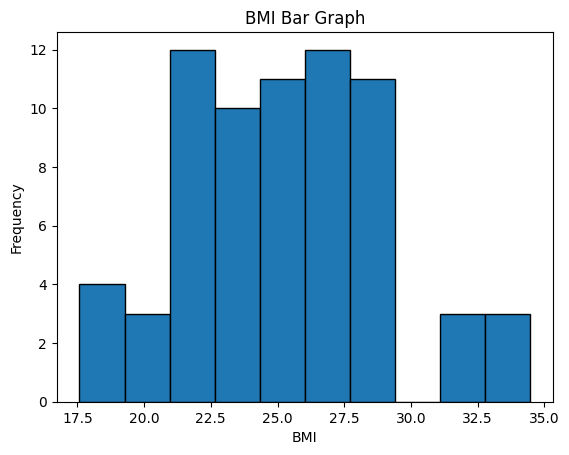

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(adm_dataset['BMI'], edgecolor = 'black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Bar Graph')
plt.show()

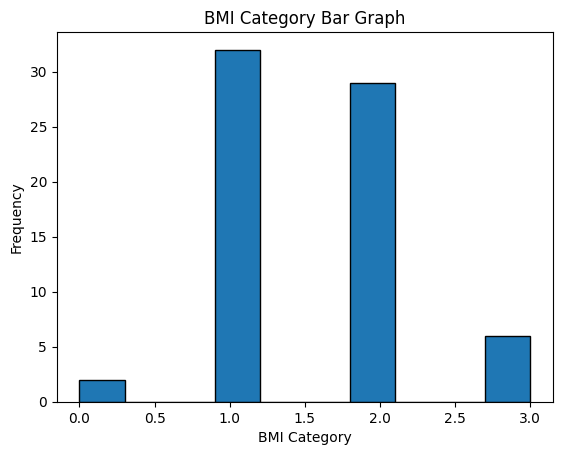

In [ ]:
plt.hist(adm_dataset['BMI_Category'], edgecolor = 'black')
plt.xlabel('BMI Category')
plt.ylabel('Frequency')
plt.title('BMI Category Bar Graph')
plt.show()

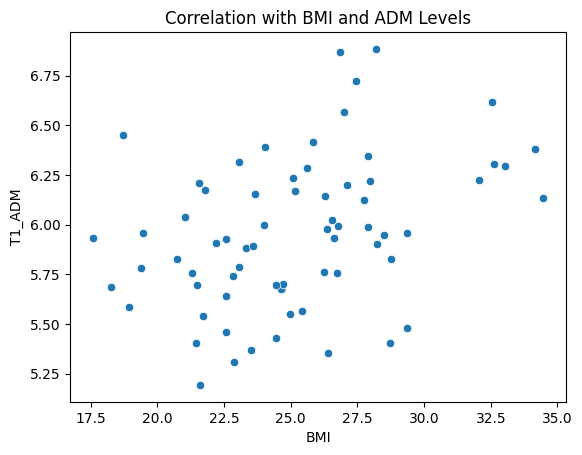

In [ ]:
sns.scatterplot(x = adm_dataset['BMI'], y = adm_dataset['T1_ADM']) #hue=medical_data['sex'])
plt.title('Correlation with BMI and ADM Levels')
plt.show()

- 0: Underweight
- 1: Healthy
- 2: Overweight
- 3: Obese

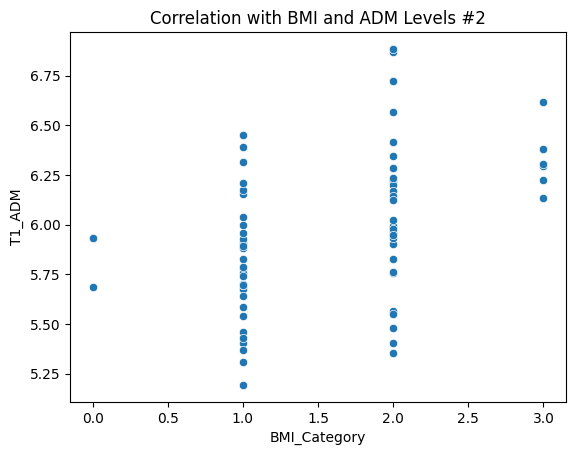

In [ ]:
sns.scatterplot(x = adm_dataset['BMI_Category'], y = adm_dataset['T1_ADM'])
plt.title('Correlation with BMI and ADM Levels #2')
plt.show()

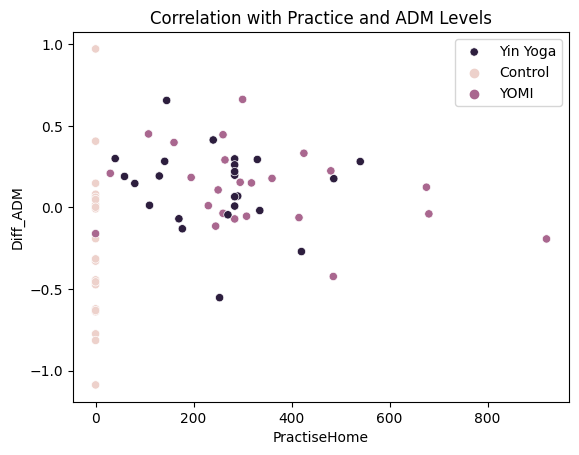

In [ ]:
sns.scatterplot(x = adm_dataset['PractiseHome'], y = adm_dataset['Diff_ADM'], hue = adm_dataset['Group'])
plt.title('Correlation with Practice and ADM Levels')
plt.legend(['Yin Yoga', 'Control', 'YOMI'])
plt.show()

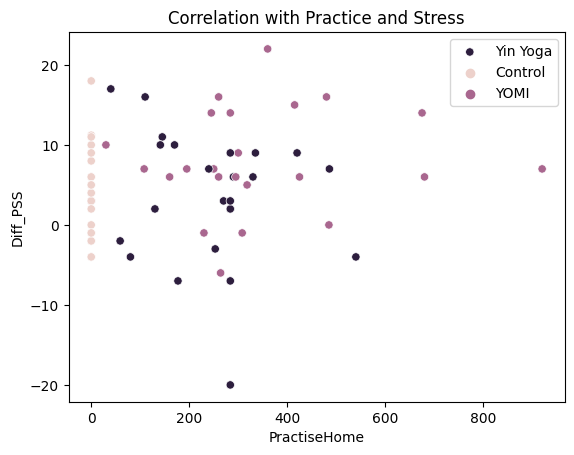

In [ ]:
sns.scatterplot(x = adm_dataset['PractiseHome'], y = adm_dataset['Diff_PSS'], hue = adm_dataset['Group'])
plt.title('Correlation with Practice and Stress')
plt.legend(['Yin Yoga', 'Control', 'YOMI'])
plt.show()

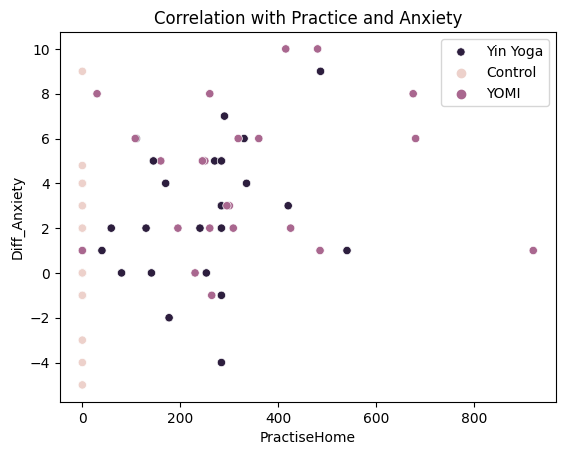

In [ ]:
sns.scatterplot(x = adm_dataset['PractiseHome'], y = adm_dataset['Diff_Anxiety'], hue = adm_dataset['Group'])
plt.title('Correlation with Practice and Anxiety')
plt.legend(['Yin Yoga', 'Control', 'YOMI'])
plt.show()

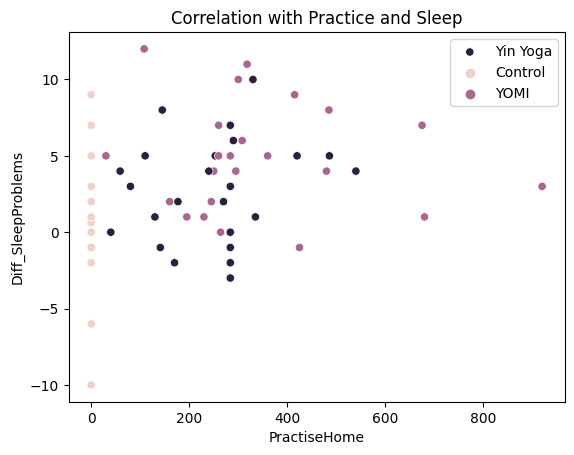

In [ ]:
sns.scatterplot(x = adm_dataset['PractiseHome'], y = adm_dataset['Diff_SleepProblems'], hue = adm_dataset['Group'])
plt.title('Correlation with Practice and Sleep')
plt.legend(['Yin Yoga', 'Control', 'YOMI'])
plt.show()

# Baseline Models

In [ ]:
from sklearn.model_selection import train_test_split

X = adm_dataset.drop(columns = 'T2_ADM')
X = X.drop(columns = 'T1_ADM')
X = X.drop(columns = 'T1_p_cystatin')

#X = X.drop(columns = 'Age')
#X = X.drop(columns = 'Gender')
#X = X.drop(columns = 'BMI_Category')
#X = X.drop(columns = 'BMI')

X = X.drop(columns = 'T2_PSS')
X = X.drop(columns = 'T2_HADSanxiety')
X = X.drop(columns = 'T2_HADSdepression')
X = X.drop(columns = 'T2_SleepProblem')
X = X.drop(columns = 'Diff_ADM')
X = X.drop(columns = 'Diff_PSS')
X = X.drop(columns = 'Diff_Anxiety')
X = X.drop(columns = 'Diff_Depression')
X = X.drop(columns = 'Diff_SleepProblems')
X = X.drop(columns = 'ID')
y = adm_dataset['Diff_ADM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = False)
print(X_test.shape)
print(y_test.shape)

(18, 10)
(18,)


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
predictions = regression_model.predict(X_test)
mae1 = mean_absolute_error(y_test, predictions)
mse1 = mean_squared_error(y_test, predictions)
r2_1 = r2_score(y_test, predictions)
print("Mean absolute error(closer to 0, the better): " + str(mae1))
print("Mean squared error(closer to 0, the better): " + str(mse1))
print("r^2 score (closer to 1, the better): " + str(r2_1))
regression_model = LinearRegression(fit_intercept = False)
regression_model.fit(X_train, y_train)
predictions = regression_model.predict(X_test)
print("Fit Intercept: " + str(mean_absolute_error(y_test, predictions)))
regression_model = LinearRegression(copy_X = False)
regression_model.fit(X_train, y_train)
predictions = regression_model.predict(X_test)
print("Copy X: " + str(mean_absolute_error(y_test, predictions)))
regression_model = LinearRegression(n_jobs = 1)
regression_model.fit(X_train, y_train)
predictions = regression_model.predict(X_test)
print("N jobs: " + str(mean_absolute_error(y_test, predictions)))
regression_model = LinearRegression(positive = True)
regression_model.fit(X_train, y_train)
predictions = regression_model.predict(X_test)
print("Positive: " + str(mean_absolute_error(y_test, predictions)))
regression_model = LinearRegression(fit_intercept= False, positive = False)
regression_model.fit(X_train, y_train)
predictions = regression_model.predict(X_test)
print("Fit Intercept + Positive mae: " + str(mean_absolute_error(y_test, predictions)))
print("Fit Intercept + Positive mse: " + str(mean_squared_error(y_test, predictions)))
print("Fit Intercept + Positive r2: " + str(r2_score(y_test, predictions)))


Mean absolute error(closer to 0, the better): 0.2439789993781202
Mean squared error(closer to 0, the better): 0.12161725785422843
r^2 score (closer to 1, the better): 0.18230954451999648
Fit Intercept: 0.24494880182505238
Copy X: 0.2439789993781202
N jobs: 0.2439789993781202
Positive: 0.25907121695248936
Fit Intercept + Positive mae: 0.24494880182505238
Fit Intercept + Positive mse: 0.12317858802846854
Fit Intercept + Positive r2: 0.17181198188904723


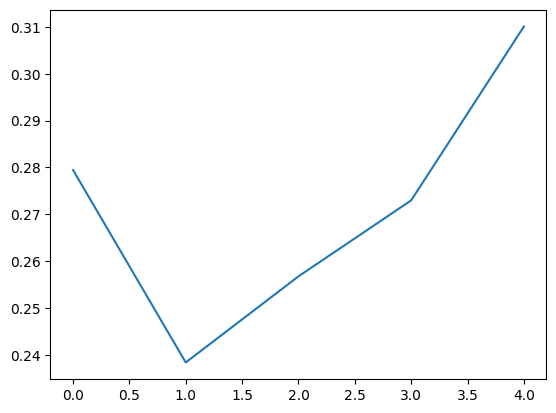

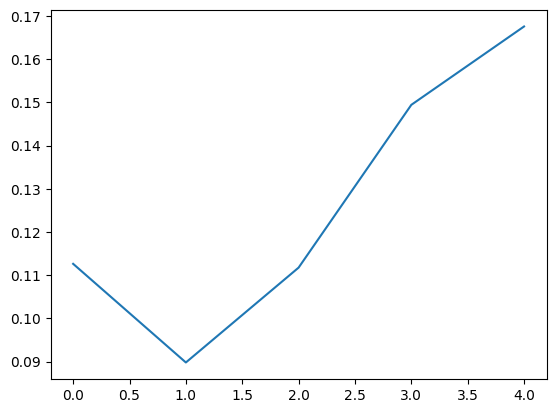

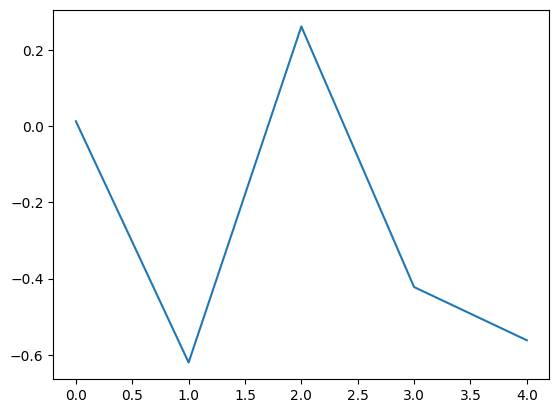

In [ ]:
average_mae = []
average_mse = []
average_r2 = []
for i in range(0, 5):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  regression_model = LinearRegression(fit_intercept= False, positive = False)
  regression_model.fit(X_train, y_train)
  predictions = regression_model.predict(X_test)
  average_mae.append(mean_absolute_error(y_test, predictions))
  average_mse.append(mean_squared_error(y_test, predictions))
  average_r2.append(r2_score(y_test, predictions))
total_mae = 0
total_mse = 0
total_r2 = 0
for i in range(0,5):
  total_mae += average_mae[i]/5
  total_mse += average_mse[i]/5
  total_r2 += average_r2[i]/5
lr_mae = total_mae
lr_mse = total_mse
lr_r2 = total_r2
plt.plot(average_mae)
plt.show()
plt.plot(average_mse)
plt.show()
plt.plot(average_r2)
plt.show()


# Random Forest Regressor

MAE: 0.3227342488422352
MSE: 0.19015968959293017
r2 score: 0.10109907409865315
optimum number of trees: 9


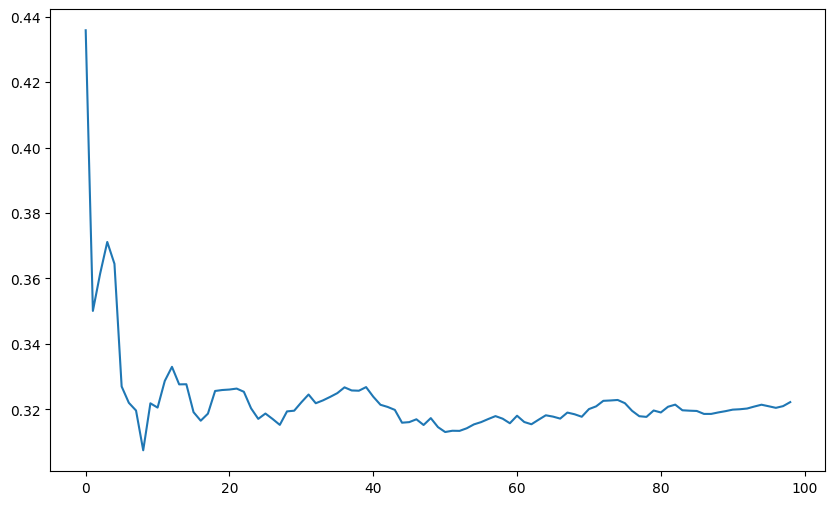

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr_mins = []
rf = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
rf.fit(X_train, y_train)
rfpred = rf.predict(X_test)
mae2 = mean_absolute_error(y_test, rfpred)
mse2 = mean_squared_error(y_test, rfpred)
r2_2 = r2_score(y_test, rfpred)
print("MAE: " + str(mae2))
print("MSE: " + str(mse2))
print("r2 score: " + str(r2_2))
mae_values = []
for k in range(1, 100):
  random_forest_model = RandomForestRegressor(n_estimators=k, random_state=0)
  random_forest_model.fit(X_train, y_train)
  predictions = random_forest_model.predict(X_test)
  mae_values.append(mean_absolute_error(y_test, predictions))

rfr_mins.append(mae2)
plt.figure(figsize=(10,6))
plt.plot(mae_values)
rfr_mins.append(min(mae_values))
tree_num = mae_values.index(min(mae_values)) + 1
print("optimum number of trees: " + str(tree_num))

Optimum depth: 1


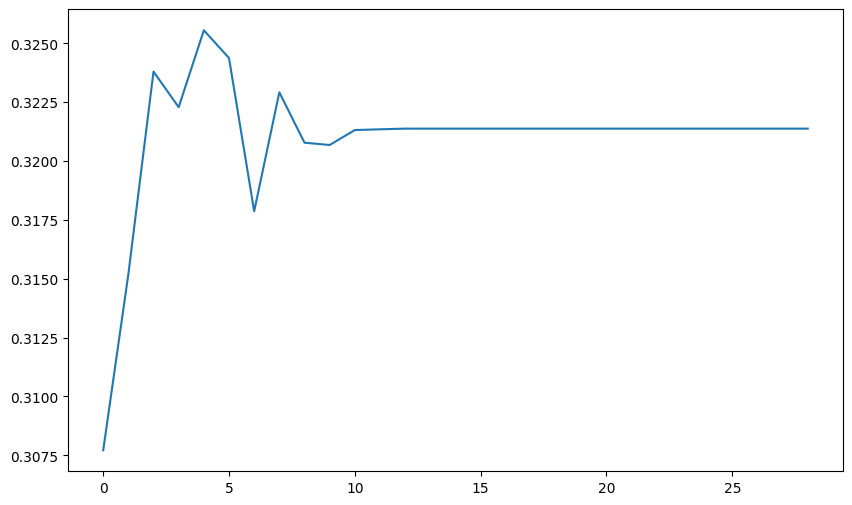

In [ ]:
mae_values = []
for k in range(1, 30):
  random_forest_model = RandomForestRegressor(max_depth=k, random_state=0)
  random_forest_model.fit(X_train, y_train)
  predictions = random_forest_model.predict(X_test)
  mae_values.append(mean_absolute_error(y_test, predictions))

plt.figure(figsize=(10,6))
plt.plot(mae_values)
rfr_mins.append(min(mae_values))
depth = mae_values.index(min(mae_values)) + 1
print("Optimum depth: " + str(depth))

Optimum criteria: squared_error
[0.3227342488422352, 0.3075012502227067, 0.3077131565626929, 0.3148725050982902]


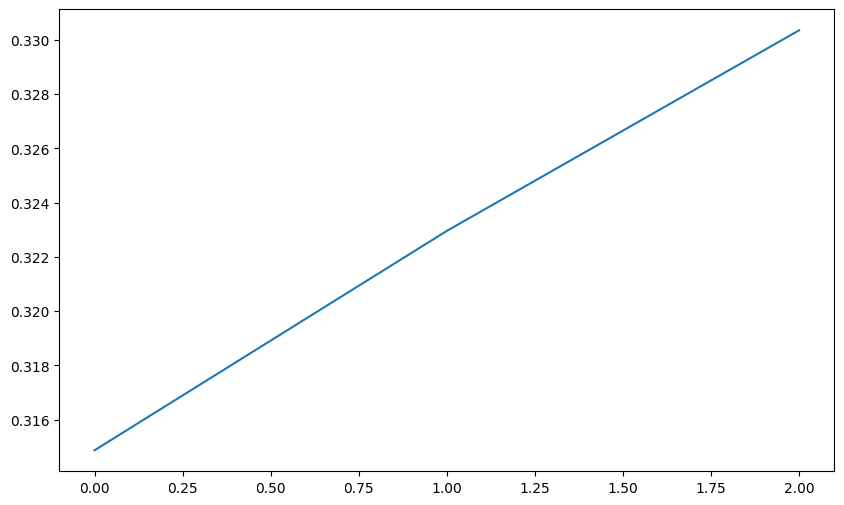

In [ ]:
mae_values = []
criteria = ["squared_error", "absolute_error", "friedman_mse"]
for k in criteria:
  random_forest_model = RandomForestRegressor(criterion = k)
  random_forest_model.fit(X_train, y_train)
  predictions = random_forest_model.predict(X_test)
  mae_values.append(mean_absolute_error(y_test, predictions))

plt.figure(figsize=(10,6))
plt.plot(mae_values)
rfr_mins.append(min(mae_values))
c = mae_values.index(min(mae_values))
print("Optimum criteria: " + criteria[c])
print(rfr_mins)


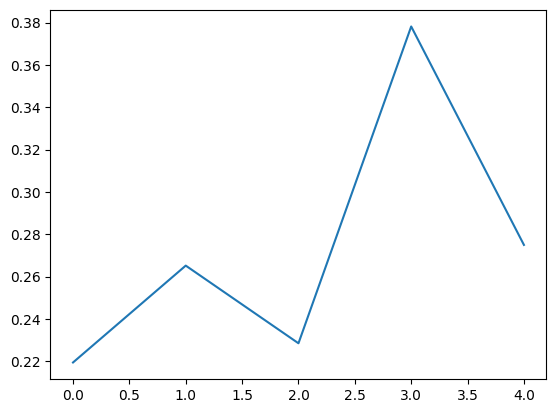

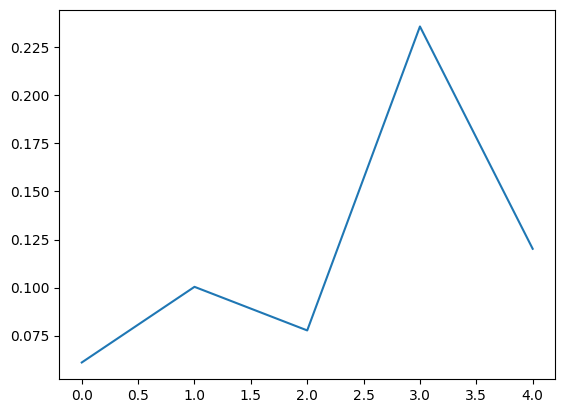

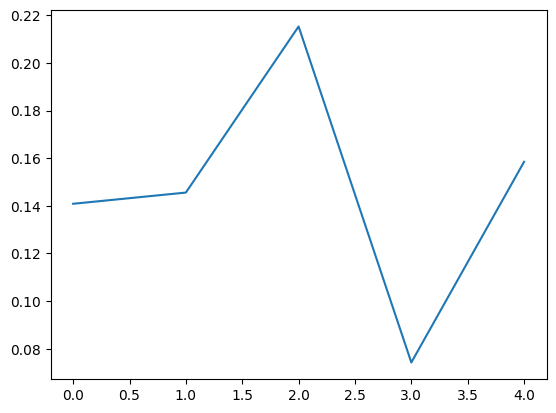

In [ ]:
average_mae = []
average_mse = []
average_r2 = []
for i in range(0, 5):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  random_forest_model = RandomForestRegressor(max_depth = depth, criterion = criteria[c]) #n_estimators = tree_num,
  random_forest_model.fit(X_train, y_train)
  predictions = random_forest_model.predict(X_test)
  average_mae.append(mean_absolute_error(y_test, predictions))
  average_mse.append(mean_squared_error(y_test, predictions))
  average_r2.append(r2_score(y_test, predictions))
total_mae = 0
total_mse = 0
total_r2 = 0
for i in range(0,5):
  total_mae += average_mae[i]/5
  total_mse += average_mse[i]/5
  total_r2 += average_r2[i]/5
rfr_mae = total_mae
rfr_mse = total_mse
rfr_r2 = total_r2
plt.plot(average_mae)
plt.show()
plt.plot(average_mse)
plt.show()
plt.plot(average_r2)
plt.show()

# Ridge

In [ ]:
from sklearn import linear_model
ridge = linear_model.Ridge()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
ridge.fit(X_train, y_train)
ridgepred = ridge.predict(X_test)
mae3 = mean_absolute_error(y_test, ridgepred)
mse3 = mean_squared_error(y_test, ridgepred)
r2_3 = r2_score(y_test, ridgepred)
print("MAE: " + str(mae3))
print("MSE: " + str(mse3))
print("r2 score: " + str(r2_3))

MAE: 0.17000603181227497
MSE: 0.04747888247113577
r2 score: 0.01416118086396112


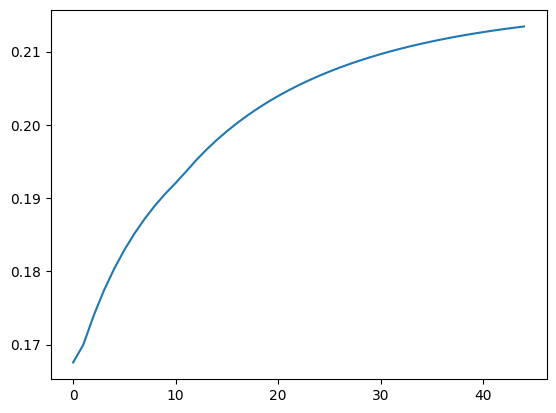

In [ ]:
mae_values = []
for k in range(0, 45):
  ridge = linear_model.Ridge(alpha = k)
  ridge.fit(X_train, y_train)
  predictions = ridge.predict(X_test)
  mae_values.append(mean_absolute_error(y_test, predictions))

a = mae_values.index(min(mae_values))
plt.plot(mae_values)

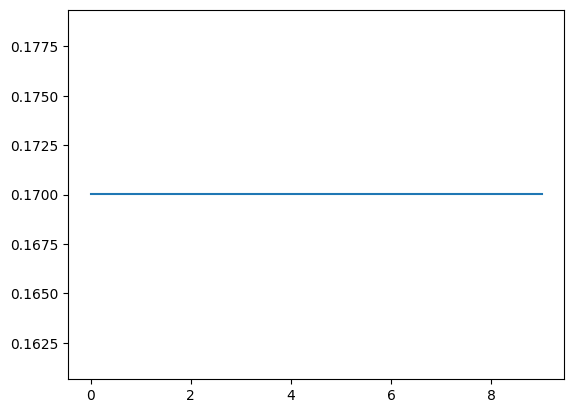

In [ ]:
mae_values = []
for k in range(0, 10):
  ridge = linear_model.Ridge(tol = k)
  ridge.fit(X_train, y_train)
  predictions = ridge.predict(X_test)
  mae_values.append(mean_absolute_error(y_test, predictions))
t = mae_values.index(min(mae_values))
plt.plot(mae_values)

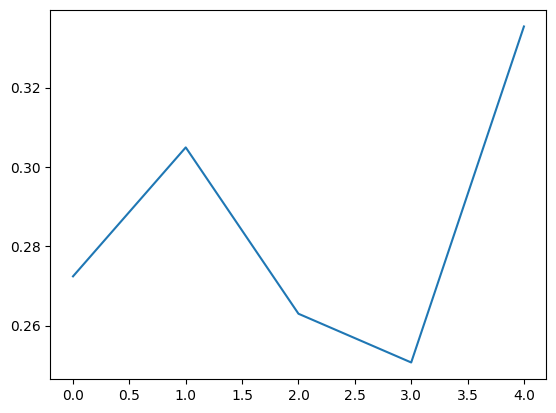

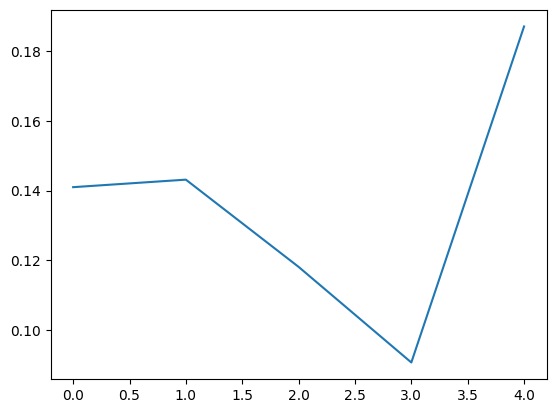

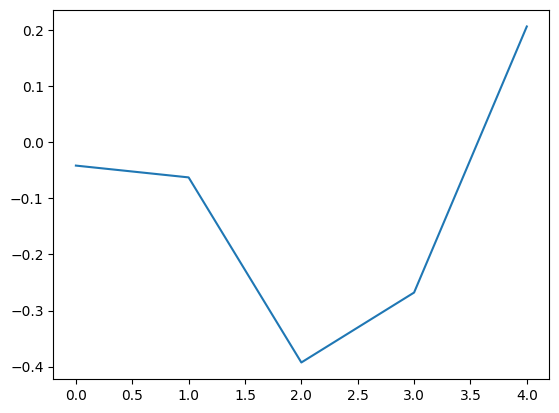

In [ ]:
average_mae = []
average_mse = []
average_r2 = []
for i in range(0, 5):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  ridge = linear_model.Ridge(alpha = a)
  ridge.fit(X_train, y_train)
  predictions = ridge.predict(X_test)
  average_mae.append(mean_absolute_error(y_test, predictions))
  average_mse.append(mean_squared_error(y_test, predictions))
  average_r2.append(r2_score(y_test, predictions))
total_mae = 0
total_mse = 0
total_r2 = 0
for i in range(0,5):
  total_mae += average_mae[i]/5
  total_mse += average_mse[i]/5
  total_r2 += average_r2[i]/5
r_mae = total_mae
r_mse = total_mse
r_r2 = total_r2
plt.plot(average_mae)
plt.show()
plt.plot(average_mse)
plt.show()
plt.plot(average_r2)
plt.show()

# Decision Tree And SVM



In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)
treepred = dec_tree.predict(X_test)
mae4 = mean_absolute_error(y_test, treepred)
mse4 = mean_squared_error(y_test, treepred)
r2_4 = r2_score(y_test, treepred)
print("MAE: " + str(mae4))
print("MSE: " + str(mse4))
print("r2 score: " + str(r2_4))
# 6 & 7 as max depth --> r2_score getting closer to 1, mae around .35, and mse around 2.0

MAE: 0.31722169282709217
MSE: 0.21401305582641927
r2 score: -1.192703974066351


In [ ]:
from sklearn import svm
svmregr = svm.SVR()
svmregr.fit(X_train, y_train)
svmpred = svmregr.predict(X_test)
mae5 = mean_absolute_error(y_test, svmpred)
mse5 = mean_squared_error(y_test, svmpred)
r2_5 = r2_score(y_test, svmpred)
print("MAE: " + str(mae5))
print("MSE: " + str(mse5))
print("r2 score: " + str(r2_5))

MAE: 0.24862322083317562
MSE: 0.0836598294161984
r2 score: 0.1428502353641642


# Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.17, shuffle = False)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
nn = Sequential()
nn.add(Dense(9,activation="softmax"))
nn.add(Dense(30, activation='relu')) #change activation
nn.add(Dense(30, activation='relu'))
nn.add(Dense(30, activation='relu'))
nn.add(Dense(30, activation='relu'))
nn.add(Dense(30, activation='relu'))
nn.add(Dense(30, activation='relu'))
nn.add(Dense(30, activation='relu'))
nn.add(Dense(30, activation='relu'))
nn.add(Dense(30, activation='relu'))
nn.add(Dense(1, activation="linear"))
nn.compile(optimizer='sgd', loss='mse', metrics=['mae'])
history = nn.fit(X_train, y_train, epochs=5, batch_size= 17, validation_split = 0.15)
#check CNN code for graphing results
#loss: 0.3975 - mean_squared_error: 0.3975 - val_loss: 0.8993 - val_mean_squared_error: 0.8993
print()
print("LR mae, mse, r2: " + str(lr_mae) + "; " + str(lr_mse) + "; " + str(lr_r2))
print("RFR mae, mse, r2: " + str(rfr_mae) + "; " + str(rfr_mse) + "; " + str(rfr_r2))
print("Ridge mae, mse, r2: " + str(r_mae) + "; " + str(r_mse) + "; " + str(r_r2))
#3/3 [==============================] - 0s 24ms/step - loss: 0.1226 - mae: 0.2605 - val_loss: 0.0475 - val_mae: 0.1783
#LR mae, mse, r2: 0.2858631546440611; 0.11608851993501182; 0.20661780082240755
#RFR mae, mse, r2: 0.2717202119164726; 0.10393795942983051; 0.2896582118831893
#Ridge mae, mse, r2: 0.28845577944260425; 0.11963273899978258; 0.18239559248045312

#3/3 [==============================] - 0s 12ms/step - loss: 0.1331 - mae: 0.2687 - val_loss: 0.0622 - val_mae: 0.1934           0.0711 - val_mae: 0.2162
#LR mae, mse, r2: 0.23887163397713124; 0.0867333126942749; 0.17591942393204307
#RFR mae, mse, r2: 0.2356219706101255; 0.08291873118821363; 0.21216296666462275
#Ridge mae, mse, r2: 0.2500665737926484; 0.0920009468426338; 0.1258699694762191


Epoch 1/5
3/3 [==============================] - 2s 190ms/step - loss: 0.1310 - mae: 0.2753 - val_loss: 0.1393 - val_mae: 0.2473
Epoch 2/5
3/3 [==============================] - 0s 35ms/step - loss: 0.1306 - mae: 0.2729 - val_loss: 0.1389 - val_mae: 0.2475
Epoch 3/5
3/3 [==============================] - 0s 35ms/step - loss: 0.1306 - mae: 0.2726 - val_loss: 0.1385 - val_mae: 0.2477
Epoch 4/5
3/3 [==============================] - 0s 37ms/step - loss: 0.1305 - mae: 0.2726 - val_loss: 0.1380 - val_mae: 0.2480
Epoch 5/5
3/3 [==============================] - 0s 35ms/step - loss: 0.1312 - mae: 0.2735 - val_loss: 0.1375 - val_mae: 0.2483

LR mae, mse, r2: 0.2715381565219998; 0.12624197487417588; -0.2661034217071458
RFR mae, mse, r2: 0.2732411067889204; 0.11902376180390367; 0.14687568217139005
Ridge mae, mse, r2: 0.2852865331987509; 0.1359788365894998; -0.11159537133297599
